# Show whether timing of cell birth throughout the movie has no influence on the intermitotic time of proliferating cells:

+ Account for all movies in the MDCK dataset
+ Calculate for cells in Gen #1-6
+ Only include cells with cell cycle duration of <7.0, 42.0>


In [1]:
import h5py
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

from Server_Movies_Paths import Get_MDCK_Movies_Paths_Temporary
from Find_Family_Members import Find_Family
from tqdm import tqdm
from scipy import stats


In [2]:
movies = Get_MDCK_Movies_Paths_Temporary()
cct, cbt = [], []

for movie in tqdm(movies):
    hdf5_file = movie + "HDF/segmented.hdf5"
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    
    with h5py.File(hdf5_file, 'r') as f:
        lbepr_1 = list(f['tracks']['obj_type_1']['LBEPR'])
        lbepr_2 = list(f['tracks']['obj_type_1']['Ch_Ch_Gen_CCT'])
        
        for cell, progeny in zip(lbepr_1, lbepr_2):
            if cell[4] != 0 and progeny[0] != 0 and progeny[1] != 0:
                if progeny[2] != 0 and progeny[2] < 7: 
                    if 7.0 <= progeny[3] <= 42.0:
                        cct.append(progeny[3])
                        cbt.append(cell[1])


100%|██████████| 44/44 [00:58<00:00,  1.34s/it]


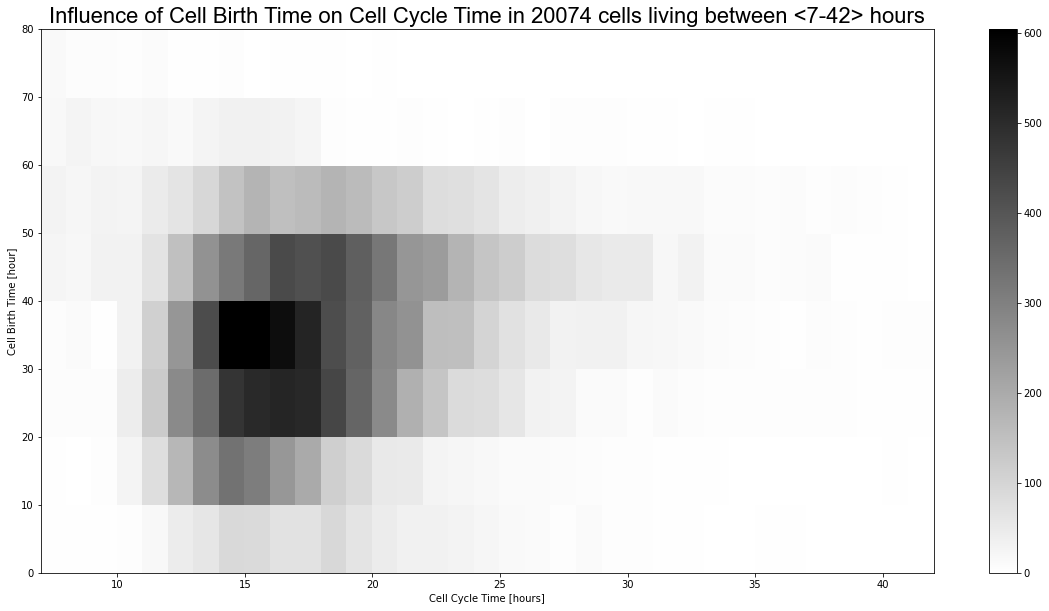

In [14]:
# Change to hours:
_ = plt.figure(figsize=(20, 10))
plt.hist2d(x=cct, y=[item * 4 / 60 for item in cbt], bins=(35, 8), range=((7, 42), (0, 80)), cmap="binary")
plt.title(f"Influence of Cell Birth Time on Cell Cycle Time in {len(cct)} cells living between <7-42> hours", fontname="Arial", fontsize=22)
plt.xlabel("Cell Cycle Time [hours]")
plt.ylabel("Cell Birth Time [hour]")
plt.colorbar()
plt.show()


### Calculate mean / median per histogram row to display in scatter plot:

In [6]:
lower, upper = 0, 10
mean_list, median_list, std_list, sem_list = [], [], [], []

for i in range(11): 
    cbt_ranged = [item_cct for item_cbt, item_cct in zip(cbt_hours, cct) if lower <= item_cbt < upper]
    mean_list.append(np.mean(cbt_ranged))
    std_list.append(np.std(cbt_ranged))
    sem_list.append(np.std(cbt_ranged)/np.sqrt(len(cbt_ranged)))
    median_list.append(np.median(cbt_ranged))
    lower += 10 
    upper += 10 

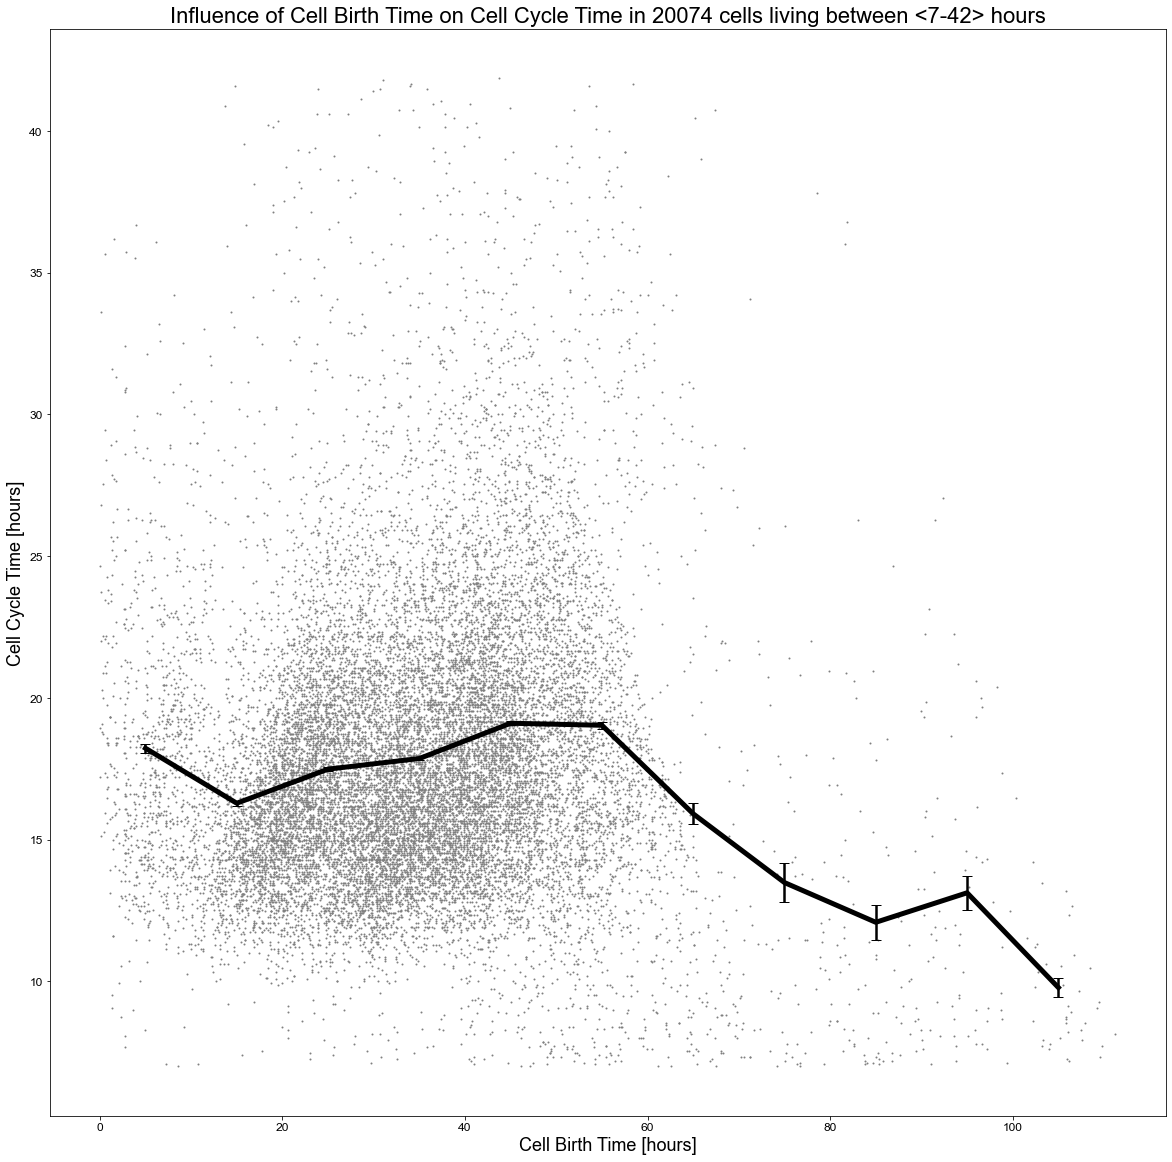

In [15]:
_ = plt.figure(figsize=(20, 20))
plt.scatter(x=[item * 4 / 60 for item in cbt], y=cct, s=1, color="grey", alpha=1.0)
plt.errorbar(x=range(5, 115, 10), y=mean_list, yerr=sem_list, color="black", linewidth=5.0, linestyle="solid", capsize=5, ecolor="black", elinewidth=2.5, label="Mean")
plt.title(f"Influence of Cell Birth Time on Cell Cycle Time in {len(cct)} cells living between <7-42> hours", fontname="Arial", fontsize=22)
plt.ylabel("Cell Cycle Time [hours]", fontname="Arial", fontsize=18)
plt.xlabel("Cell Birth Time [hours]", fontname="Arial", fontsize=18)
plt.xticks(fontname="Arial", fontsize=12)
plt.yticks(fontname="Arial", fontsize=12)
plt.show()


### Done!